In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mistag/short-videos")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'short-videos' dataset.
Path to dataset files: /kaggle/input/short-videos


In [18]:
import cv2
import os

video_filename = 'elefant_1280p.mp4'
downloaded_path = '/kaggle/input/short-videos'

subdirectories = ['animals', 'food', 'insects']
video_path = None

for subdir in subdirectories:
    potential_path = os.path.join(downloaded_path, subdir, video_filename)
    if os.path.exists(potential_path):
        video_path = potential_path
        break

if video_path is None:
    print(f"Error: Could not find video file {video_filename} in the expected directories.")
else:
    print(f"Found video file at: {video_path}")
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
    else:
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frame_count / fps

        print(f"Video Metadata:")
        print(f"Frames per second (FPS): {fps}")
        print(f"Total frame count: {frame_count}")
        print(f"Duration (seconds): {duration}")

        cap.release()

Found video file at: /kaggle/input/short-videos/animals/elefant_1280p.mp4
Video Metadata:
Frames per second (FPS): 29.97002997002997
Total frame count: 1064
Duration (seconds): 35.50213333333333


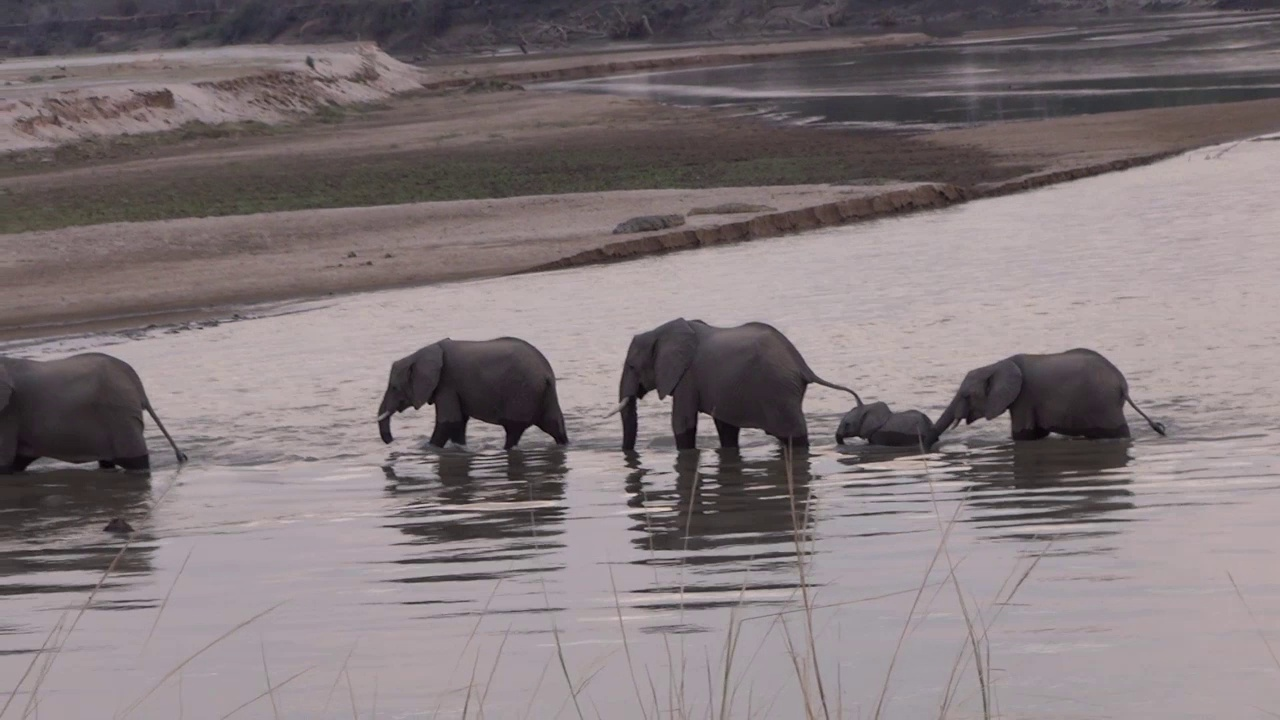

In [20]:
import time
from IPython.display import display, clear_output, Image
import io

# Re-open the video file
video_path = '/kaggle/input/short-videos/animals/elefant_1280p.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Encode the frame as JPEG
        is_success, buffer = cv2.imencode(".jpg", frame)

        if is_success:
            # Convert to bytes
            byte_im = io.BytesIO(buffer).getvalue()

            # Display the image
            clear_output(wait=True)
            display(Image(data=byte_im))

            time.sleep(0.03)

    cap.release()

In [21]:
import os

downloaded_path = '/kaggle/input/short-videos'
subdirectories = ['animals', 'food', 'insects']

for subdir in subdirectories:
    subdir_path = os.path.join(downloaded_path, subdir)
    if os.path.exists(subdir_path):
        print(f"\nContents of {subdir_path}:")
        for item in os.listdir(subdir_path):
            print(item)
    else:
        print(f"\nError: Subdirectory not found: {subdir_path}")


Contents of /kaggle/input/short-videos/animals:
elefant_1280p.mp4
giraffes_1280p.mp4

Contents of /kaggle/input/short-videos/food:
seafood_1280p.mp4

Contents of /kaggle/input/short-videos/insects:
butterflies_960p.mp4
butterflies_1280.mp4


In [23]:
import os
import cv2

video_path = '/kaggle/input/short-videos/animals/elefant_1280p.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    output_dir = 'extracted_frames'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps <= 0:
        print("Error: Could not get video FPS or FPS is zero.")
    else:
        frames_to_extract_per_second = 3
        frame_interval = max(1, int(round(fps / frames_to_extract_per_second)))

        frame_counter = 0
        saved_frame_count = 0

        while True:
            ret, frame = cap.read()

            if not ret:
                break

            frame_counter += 1

            if frame_counter % frame_interval == 0:

                frame_filename = os.path.join(output_dir, f'frame_{saved_frame_count:04d}.jpg')

                cv2.imwrite(frame_filename, frame)
                saved_frame_count += 1
                print(f"Saved {frame_filename}")

        print(f"Finished extracting and saving frames. Total frames saved: {saved_frame_count}")
    cap.release()

Created directory: extracted_frames
Saved extracted_frames/frame_0000.jpg
Saved extracted_frames/frame_0001.jpg
Saved extracted_frames/frame_0002.jpg
Saved extracted_frames/frame_0003.jpg
Saved extracted_frames/frame_0004.jpg
Saved extracted_frames/frame_0005.jpg
Saved extracted_frames/frame_0006.jpg
Saved extracted_frames/frame_0007.jpg
Saved extracted_frames/frame_0008.jpg
Saved extracted_frames/frame_0009.jpg
Saved extracted_frames/frame_0010.jpg
Saved extracted_frames/frame_0011.jpg
Saved extracted_frames/frame_0012.jpg
Saved extracted_frames/frame_0013.jpg
Saved extracted_frames/frame_0014.jpg
Saved extracted_frames/frame_0015.jpg
Saved extracted_frames/frame_0016.jpg
Saved extracted_frames/frame_0017.jpg
Saved extracted_frames/frame_0018.jpg
Saved extracted_frames/frame_0019.jpg
Saved extracted_frames/frame_0020.jpg
Saved extracted_frames/frame_0021.jpg
Saved extracted_frames/frame_0022.jpg
Saved extracted_frames/frame_0023.jpg
Saved extracted_frames/frame_0024.jpg
Saved extracte